<a href="https://colab.research.google.com/github/fia27/fiaspace/blob/master/copy_of_untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A.1 installing package
!pip install pandas
!pip install pandasql
!pip install --upgrade 'sqlalchemy <2.0'
!pip install plotly
#!pip install dash
!pip install jupyter-dash

In [3]:
# Library data manipulation
import pandas as pd
import pandasql as ps

# Library Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Library Dashboarding
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output

In [4]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
csv_url = 'https://raw.githubusercontent.com/username/repository/master/filename.csv'

In [5]:
link = 'https://drive.google.com/file/d/1T__tPiZpQYZgyCzSMEVSlEtRdMmcdzZ9/view?usp=drive_link'
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('DQLab_listings(22Sep2022) (1).csv') 
 
datalist = pd.read_csv('DQLab_listings(22Sep2022) (1).csv')

In [6]:
link2 = 'https://drive.google.com/file/d/18qlVrm4HO5AX-_yZdj7M9Nshe4qltWDz/view?usp=drive_link'
id = link2.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('DQLab_reviews(22Sep2022).csv')
 
datarev = pd.read_csv('DQLab_reviews(22Sep2022).csv') 

In [7]:
link3 = 'https://drive.google.com/file/d/1PK4sJzbTbERo3SzEHhXVOgdVoQWWfRhh/view?usp=drive_link'
id = link3.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('DQLab_nieghbourhood(22Sep2022).csv')
 
datanieg = pd.read_csv('DQLab_nieghbourhood(22Sep2022).csv') 

In [9]:
datalist.join()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


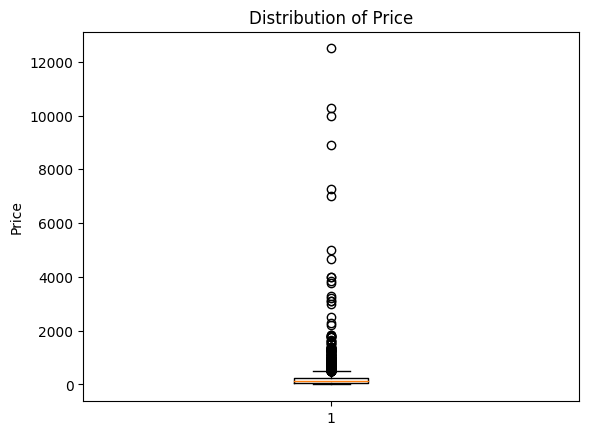

In [14]:
price_data = datalist['price']

# Create the box plot
plt.boxplot(price_data)
plt.ylabel('Price')
plt.title('Distribution of Price')
plt.show()

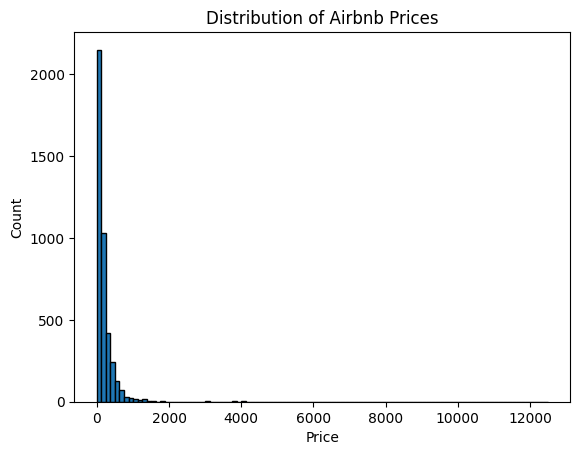

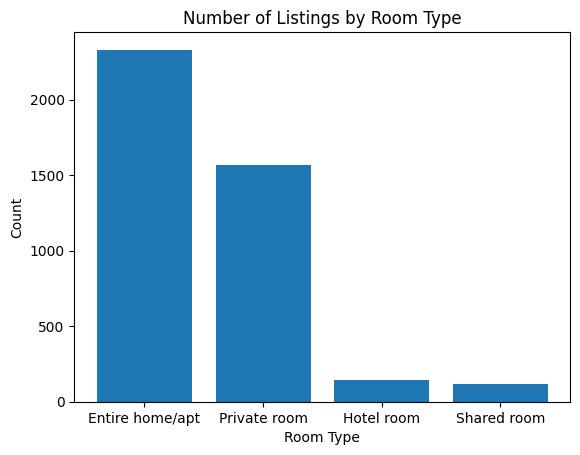

Number of Listings: 4161
Average Price: 214.50516702715694
Minimum Price: 0
Maximum Price: 12494
Top 5 Neighborhoods:
 Bishan                   1
Woodlands                1
North-Eastern Islands    1
Punggol                  1
Seletar                  1
Name: neighbourhood, dtype: int64


In [ ]:
# Data Analysis

# Basic statistics
num_listings = len(datalist)
average_price = datalist['price'].mean()
min_price = datalist['price'].min()
max_price = datalist['price'].max()

# Histogram of prices
plt.hist(datalist['price'], bins=100, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Prices')
plt.show()

# Bar chart of room types
room_type_counts = datalist['room_type'].value_counts()
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

# Business Recommendations

# Identify popular neighborhoods
top_neighborhoods = datanieg['neighbourhood'].value_counts().head(5)

# Calculate average prices by neighborhood
#neighborhood_prices = datanieg.groupby('neighbourhood')['price'].mean()

# Identify the most expensive neighborhood
#most_expensive_neighborhood = neighborhood_prices.idxmax()

# Print the analysis results
print('Number of Listings:', num_listings)
print('Average Price:', average_price)
print('Minimum Price:', min_price)
print('Maximum Price:', max_price)
print('Top 5 Neighborhoods:\n', top_neighborhoods)
#print('Average Prices by Neighborhood:\n', neighborhood_prices)
#print('Most Expensive Neighborhood:', most_expensive_neighborhood)